# Julia Essentials

## Exercise 1

In [1]:
x_vals = [1.0, 2.0, 3.0]
y_vals = [3.0, 2.0, 1.0]
innerprod = 0
for (i, j) in zip(x_vals, y_vals)
    innerprod = innerprod + i * j;
end
innerprod

10.0

In [2]:
sum(iseven(x) for x in 0:99)

50

In [3]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum(iseven(x) && iseven(y) for (x, y) in pairs)

2

## Exercise 2

In [4]:
function p(x, coeff)
    res = 0;
    for (i, a) in enumerate(coeff)
        res = res + a * x^(i-1)
    end
    return res
end

p(2, [1.0, 2.0, 3.0])

17.0

## Exercise 3

In [5]:
function n_upper(str)
    return sum(uppercase(x) == x for x in str)
end

n_upper("aBdDsA")

3

## Exercise 4

In [6]:
function compareseq(seq_a, seq_b)
    res = true
    for x in seq_a
        foundx = false
        for y in seq_b
            if x == y
                foundx = true
                break
            end
        end
        if !foundx
            res = false
            break
        end
    end
    return res
end

compareseq([8,5], [1,2,3,4])        

false

## Exercise 5

In [7]:
using Plots

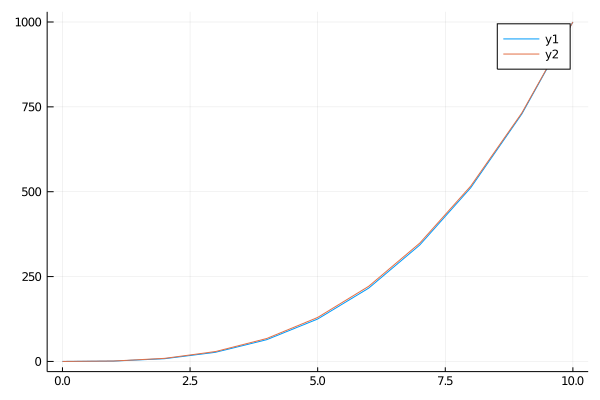

In [8]:
function linapprox(f, a, b, n, x)
    @assert a <= x <= b
    if x == a
        return f(a)
    elseif x == b
        return f(b)
    else
        grids = range(a, b, length=n)
        res = 0
        for i in 1:size(grids,1)-1
            res = res + (grids[i]<=x<grids[i+1])*(f(grids[i])+(f(grids[i+1])-f(grids[i]))/(grids[i+1]-grids[i])*(x-grids[i]))
        end
        return res
    end
end

f(x) = x^3
g(x) = linapprox(f, 0, 10, 10, x)

plot(f, 0:10)
plot!(g, 0:10)

## Exercise 6

In [9]:
open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end

167

In [10]:
open("us_cities.txt", "r") do f
    tot = 0
    for x in eachline(f)
        tot += parse(Int, split(x, ":")[2])
    end
    tot
end

23831986

## Exercise 7

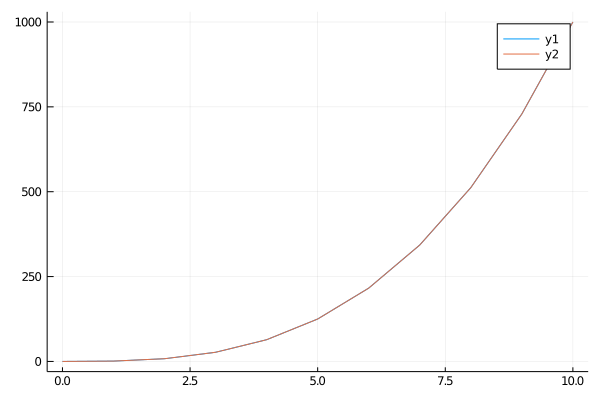

In [11]:
function linapprox(f, nodes, x)
    @assert nodes[1] <= x <= nodes[end]
    @assert length(nodes) > 1
    # Find start position
    i = convert(Int, floor((x-nodes[1])/step(nodes))) + 1
    if i == length(nodes)
        return f(x)
    else
        return (f(nodes[i])+(f(nodes[i+1])-f(nodes[i]))/(nodes[i+1]-nodes[i])*(x-nodes[i]))
    end
    
end

f(x) = x^3
g(x) = linapprox(f, 0:0.1:10, x)

plot(f, 0:10)
plot!(g, 0:10)